## Objectives

- Assessing the accuracy of the coefficients 
- Understanding the confidence intervals of coefficients
- Understanding the accuracy of the model
- qq-plots

## The  Accuracy of the Coefficient Estimates

In [12]:
import seaborn as sns

import matplotlib.pyplot as plt

car_crashes_df = sns.load_dataset('car_crashes')

df = car_crashes_df[['alcohol', 'total']]

car_crashes_df.head()

,total,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses,abbrev
0,18.8,7.332,5.640,18.048,15.040,784.55,145.08,AL
1,18.1,7.421,4.525,16.290,17.014,1053.48,133.93,AK
2,18.6,6.510,5.208,15.624,17.856,899.47,110.35,AZ
3,22.4,4.032,5.824,21.056,21.280,827.34,142.39,AR
4,12.0,4.200,3.360,10.920,10.680,878.41,165.63,CA


In [13]:
df.head()

,alcohol,total
0,5.640,18.8
1,4.525,18.1
2,5.208,18.6
3,5.824,22.4
4,3.360,12.0


There is no causality in real world. so don't talk about causality ds. 
the basic idea is checking a correlation. 

Check for **AIC** and **BIC** to check effectivence of our model.  

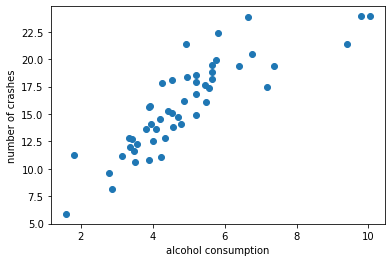

In [3]:
## let's plot df

plt.scatter(car_crashes_df['alcohol'], car_crashes_df['total'])

plt.xlabel('alcohol consumption')

plt.ylabel('number of crashes')
plt.show()

In [7]:
## use statsmodel to fit a line to the data
import statsmodels.api as sm

In [5]:
X = df.alcohol
y = df.total
X = sm.add_constant(X)
mod = sm.OLS(y, X, hasconst= True)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                  total   R-squared:                       0.727
Model:                            OLS   Adj. R-squared:                  0.721
Method:                 Least Squares   F-statistic:                     130.5
Date:                Fri, 04 Oct 2019   Prob (F-statistic):           2.04e-15
Time:                        08:34:25   Log-Likelihood:                -110.99
No. Observations:                  51   AIC:                             226.0
Df Residuals:                      49   BIC:                             229.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.8578      0.921      6.357      0.0

//anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


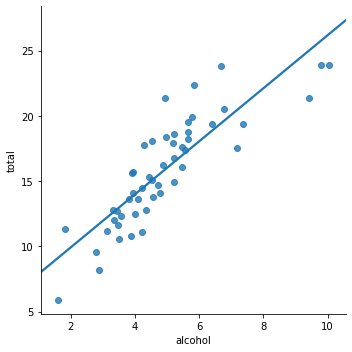

In [6]:
sns.lmplot(x = 'alcohol', y = 'total', data = df, ci = 0  );

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

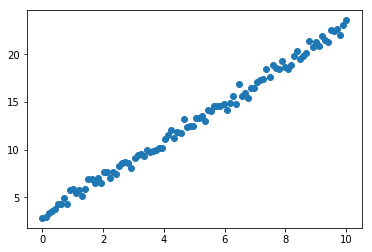

In [3]:
X = np.linspace(0, 10, 100)
y = 3 + 2*X + np.random.normal(0, 0.4, 100)
plt.scatter(X,y)

In [8]:
intercepts = []
slopes = []
for i in range(100):

    X = np.linspace(0, 10, 100)

    y = 3 + 2*X + np.random.normal(0, 0.4, 100)

    sim = np.stack([X,y], axis=1)
    sim_df = pd.DataFrame(sim, columns= ['X', 'y'])

    X = sm.add_constant(X)

    model = sm.OLS(y,X, hasconst=True)

    res = model.fit()
    
    intercepts.append(res.params[0])
    slopes.append(res.params[1])

/anaconda3/envs/learn-env/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


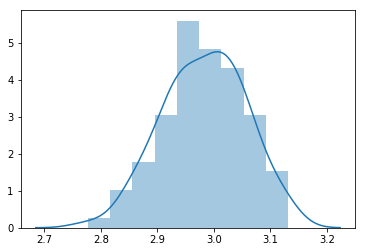

In [9]:
sns.distplot(intercepts)

** The slop and the intercept should follow some kind of distribution like normal, t-dist, f-dist or 
check the following code**

>OLS do not add the intercept team, so we have to add `sm.add_constant(X)` term in our regression model to account for the intercept 

/anaconda3/envs/learn-env/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


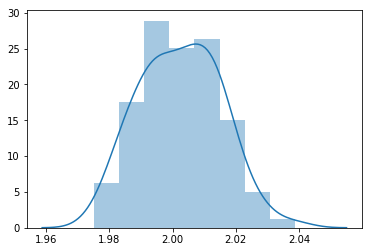

In [11]:
sns.distplot(slopes)
# confidence interal
# the slope a

As we see above we can consider $\beta_{0}$ and $\beta_{1}$ as some sample statistics. Therefore we would like to understand how close are they to the true (population) parameters. To do this we find their confidence intervals:

<img src="confidence_intervals.png" cap="Confidence intervals"  width='550'/>

Then the confidence intervals will be given as 

$$ \big[\widehat{\beta}_{1} - 2\cdot SE(\widehat{\beta}_{1}), \quad \widehat{\beta}_{1} + 2 \cdot SE(\widehat{\beta}_{1})\big]$$

similarly for the intercept

$$ \big[\widehat{\beta}_{0} - 2\cdot SE(\widehat{\beta}_{0}),\quad \widehat{\beta}_{0} + 2 \cdot SE(\widehat{\beta}_{0})\big]$$


## Assessing the Accuracy of the Model
When we assess the accuracy of the coefficients basically we check whether there is a real relationship between X and y. After we concluded that there is a significant relationship between variables it is natural to want to quantify the extent to which the model fits the data. The quality of a linear regression fit is typically assessed using the $R^{2}$ statistic. 

### $R^{2}$ statistic

Recall that we can find 'the best' line so that the _Residual Sum of Squares_ (RSS) is minimized:


<img src="rss.png" cap="RSS"  width='550'/>


We will assess the accuracy of the model by comparing this with the Total Sum of Squares (TSS):

$$ TSS = \sum (y_{i} - \bar{y}) $$


TSS measures the total variance in the response Y , and can be thought of as the amount of variability inherent in the response before the regression is performed. In contrast, RSS measures the amount of variability that is left unexplained after performing the regression.



Hence, TSS − RSS measures the amount of variability in the response that is explained (or removed) by performing the regression, and $R^{2}$ measures the proportion of variability in Y that can be explained using X.

<img src="rsquared.png" cap="RSS"  width='250'/>

$R^{2}$ of 0.7 means 


### Residuals and QQ-plots

In [14]:
X = df.alcohol
y = df.total
X = sm.add_constant(X)
mod = sm.OLS(y, X, hasconst= True)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                  total   R-squared:                       0.727
Model:                            OLS   Adj. R-squared:                  0.721
Method:                 Least Squares   F-statistic:                     130.5
Date:                Fri, 04 Oct 2019   Prob (F-statistic):           2.04e-15
Time:                        10:36:55   Log-Likelihood:                -110.99
No. Observations:                  51   AIC:                             226.0
Df Residuals:                      49   BIC:                             229.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.8578      0.921      6.357      0.0

In [15]:
from scipy.stats import stats

In [16]:
residuals = res.resid

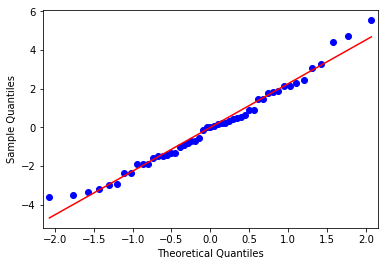

In [17]:
fig = sm.qqplot(residuals, line = 'r')
plt.show()

/anaconda3/envs/learn-env/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


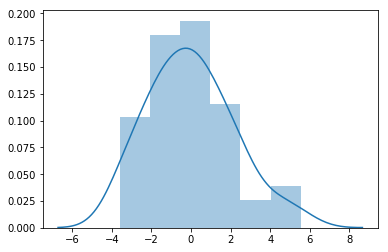

In [18]:
sns.distplot(residuals)

In [36]:
y_pred = residuals.
# print(residuals.shape)
# print(y_pred.shape)
type(y_pred)
# plt.scatter(y_pred, residuals)
# plt.axhline(y=0, color='red', linestyle='--')

method

Book: An Introduction to Statistical Learning. we have to read chapter two ("Statistical learning")

In [2]:
import numpy as np 
np.linspace(0,10,100)

array([ 0.        ,  0.1010101 ,  0.2020202 ,  0.3030303 ,  0.4040404 ,
        0.50505051,  0.60606061,  0.70707071,  0.80808081,  0.90909091,
        1.01010101,  1.11111111,  1.21212121,  1.31313131,  1.41414141,
        1.51515152,  1.61616162,  1.71717172,  1.81818182,  1.91919192,
        2.02020202,  2.12121212,  2.22222222,  2.32323232,  2.42424242,
        2.52525253,  2.62626263,  2.72727273,  2.82828283,  2.92929293,
        3.03030303,  3.13131313,  3.23232323,  3.33333333,  3.43434343,
        3.53535354,  3.63636364,  3.73737374,  3.83838384,  3.93939394,
        4.04040404,  4.14141414,  4.24242424,  4.34343434,  4.44444444,
        4.54545455,  4.64646465,  4.74747475,  4.84848485,  4.94949495,
        5.05050505,  5.15151515,  5.25252525,  5.35353535,  5.45454545,
        5.55555556,  5.65656566,  5.75757576,  5.85858586,  5.95959596,
        6.06060606,  6.16161616,  6.26262626,  6.36363636,  6.46464646,
        6.56565657,  6.66666667,  6.76767677,  6.86868687,  6.96